# COVID-19 CASE STUDY.


# DATA ANALYSIS PROBLEMS


## Question 1 :- DATA LOADING.


### Q1.1 :- How do you load the COVID-19 datasets for confirmed cases,deaths,and recoveries into python using Pandas?

Ans :- We can load all the files using .read_csv() method from the pandas in their respective variables.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## loading the files
confirmed_cases_data = pd.read_csv("covid_19_confirmed_v1_lyst1747728690432.csv")



ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
death_cases_data = pd.read_csv("covid_19_deaths_v1_lyst1747728711771.csv")

In [ ]:
recovered_cases_data = pd.read_csv("covid_19_recovered_v1_lyst1747728719904.csv")

## Q 2 :- Data Exploration.


### Q 2.1 :- After loading the datasets, what is the structure of each dataset in terms of rows , columns, and datatypes.

Ans :- I am using .info() method to show the overall structure and
for better idea of rows and columns count using .shape attribute
and .dtypes attribute for the types of each column.


In [51]:
print("Confirmed Dataset :")
confirmed_cases_data.info()
print("\nShape: ",confirmed_cases_data.shape)
print("\nTypes: ",confirmed_cases_data.dtypes)
print("--------------------------------------------------------------------")

print("Deaths Dataset :")
death_cases_data.info()
print("\nShape: ",death_cases_data.shape)
print("\nTypes: ",death_cases_data.dtypes)
print("--------------------------------------------------------------------")


print("Recovered Dataset :")
recovered_cases_data.info()
print("\nShape: ",recovered_cases_data.shape)
print("\nTypes: ",recovered_cases_data.dtypes)
print("--------------------------------------------------------------------")

Confirmed Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB

Shape:  (276, 498)

Types:  Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object
--------------------------------------------------------------------
Deaths Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Columns: 498 entries, Column1 to Column498
dtypes: object(498)
memory usage: 1.1+ MB

Shape:  (277, 498)

Types:  Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Co

### Q 2.2 :- Generate plots of confirmed cases over time for the top countries.

Ans :-

1. I am thinking of grouping the data by country, using sum aggregation, because it will give me all Provinces cases in one row of country.

2. So first i will drop the lat,long,province/state column because we have to convert our date columns types from int to datetime and we can't convert these three.

3. Converting the columns to datetime in mm/dd/yy format.

4. Now we need the top countries (we take top 5) so we for that we need to get the cases of each country from the last date.

5. So i will select the last column and retrive all rows for that column only.

6. Now I will sort the data in descending order so it will give me the country with highest cases at top.

7. Now I use .head(5) to retrive the top 5 data and choose their index only because I need just the country names.

8. SEARCHED :- I don't remembered how to plot multiple result so i googled this and go to know that we can put loop.

9. In graph at x-axis we have all the dates and y-axis represents the case count


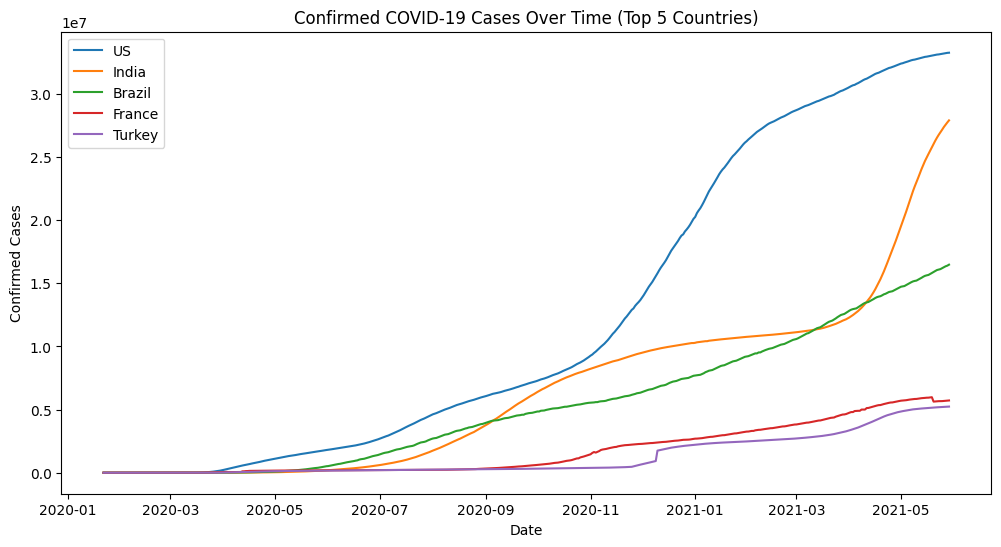

In [94]:
# Droping latitude and longitude columns 
country_confirmed = confirmed_cases_data.drop(['Lat', 'Long','Province/State'], axis=1)

# Sum over all provinces/states for each country
country_confirmed = country_confirmed.groupby('Country/Region').sum()

# 3. Convert date column names to datetime
country_confirmed.columns = pd.to_datetime(country_confirmed.columns,format='%m/%d/%y', errors='coerce')


# Get the last date column (already in datetime format)
last_date = country_confirmed.columns[-1]

# Get the data for the last date for all countries
last_date_data = country_confirmed[last_date]


# Sort the values in descending order to get the top countries
countries_with_highest_cases = last_date_data.sort_values(ascending=False)

# Pick top 5 countries
top_5_countries = countries_with_highest_cases.head(5).index


# Plot confirmed cases over time for the top 5 countries
plt.figure(figsize=(12, 6))

for country in top_5_countries:
    plt.plot(country_confirmed.columns, country_confirmed.loc[country], label=country)

plt.title('Confirmed COVID-19 Cases Over Time (Top 5 Countries)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()


### Q2.3: Generate plots of confirmed cases over time for China.

Ans:

1. I already have the whole data aranged and ready so I just choosed the country china.


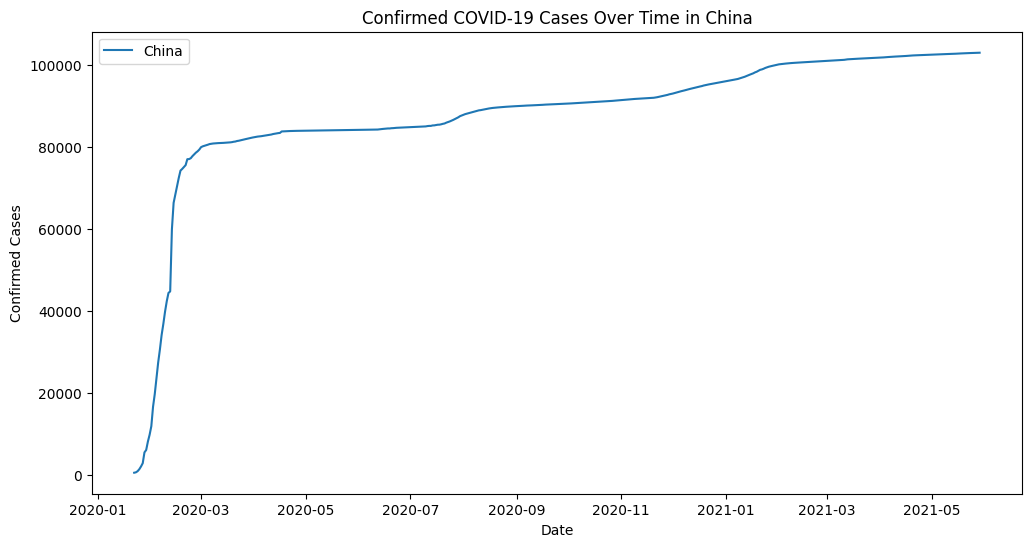

In [96]:
country = 'China'

# Plot confirmed cases over time for China
plt.figure(figsize=(12, 6))

plt.plot(country_confirmed.columns, country_confirmed.loc[country], label=country)

plt.title('Confirmed COVID-19 Cases Over Time in China')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()


## Q 3 :- Handling Missing Data


### 3.1:- Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

Ans

1. Null data from confirmed
   -> Lat and long have 2 , 2 null vals

   -> Province/State 190 null vals.

   -> country/region have 0 null vals.

   -> Check for null values in only the date columns (excluding the first 4 columns)

   -> and there are no null data.

2. Null data status from deaths file
   -> Province/state 190 null values
   -> Lat / Long 2 2 null values
   -> 4/20/20 have 1 null values.

3. Null data status from recovered file
   -> 191 Null provinces
   -> 1 Lat and 1 Long are null
   -> 4/20/20 is null

I Removed the null data from date columns and also remove the two extra row in both death and recovered each.


In [169]:
## First Checking the missing data for Confirmed Cases.
print(confirmed_cases_data.isnull().sum())
date_columns = confirmed_cases_data.columns[4:]
null_counts = confirmed_cases_data[date_columns].isnull().sum()
print("Null values in date columns:")
print(null_counts[null_counts > 0]) ## creating a list to check that where null_counts > 0 we insert it here.


##NO filling done.

Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
Null values in date columns:
Series([], dtype: int64)


In [ ]:
# Checking null values in the deaths data
# We will remove first row from our data assuming that is not the part of data.
new_header = death_cases_data.iloc[0]

death_data_cleaned = death_cases_data[1:].copy()


death_data_cleaned.columns = new_header

death_data_cleaned.reset_index(drop=True,inplace=True)

death_cases_data = death_data_cleaned

## I removed it.
death_cases_data.head(10)

print(death_cases_data.isnull().sum())
# we'll check for all dates
death_columns = death_cases_data.columns[4:]
count_null = death_cases_data[death_columns].isnull().sum()
print("Printing columns with null values: ")
print(count_null[count_null > 0])



# For all date columns, we do the fill, then bfill
death_cases_data[death_columns] = death_cases_data[death_columns].ffill(axis=1).bfill(axis=1)


0
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64


In [ ]:
#Now we are going to do the same thing with the 
new_header = recovered_cases_data.iloc[0]

recovered_cleaned_data = recovered_cases_data[1:].copy()

recovered_cleaned_data.columns = new_header

recovered_cleaned_data.reset_index(inplace=True,drop=True)

recovered_cases_data = recovered_cleaned_data

print(recovered_cases_data.isnull().sum())
date_columns = recovered_cases_data.columns[4:]
null_count = recovered_cases_data[date_columns].isnull().sum()
print(null_count[null_count > 0])


## removing null values.
recovered_cases_data[date_columns] = recovered_cases_data[date_columns].bfill(axis=1).ffill(axis=1)

0
Province/State    191
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
Series([], dtype: int64)


## Q 4:- DATA Cleaning and Preparation.


### Q4.1: Replace blank values in the province column with “All Provinces.”

Ans :-
All the null provinces are filled with "All Provinces"


In [243]:
## removing blank from confirmed
confirmed_cases_data['Province/State'] = confirmed_cases_data['Province/State'].fillna(value="All Provinces")

## removing blank Provinces from deaths
death_cases_data['Province/State'] = death_cases_data['Province/State'].fillna(value="All Provinces")

## removing blank Provinces from recovered
recovered_cases_data['Province/State'] = recovered_cases_data['Province/State'].fillna(value="All Provinces")


## Q 5 :- INDEPENDENT DATA ANALYSIS


### Q 5.1 :- Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

Ans :- For the first part of the Question.

1. First I will drop the Province/State column.

2. To find peak new case each day first we have to find each new cases each day but the data that we have includes the cumulative no of cases so first we have to remove that cumulativeness.

3. So that's why I create a copy of our original data.
4. now i will retrive the day columns
5. Now I will fill all the columns with the value 0.
6. Hence now we have data that have 0 in each row,col , now to find daily cases we will subtract yesterday cases with currentday case and will do this for each row . subtraction will go column wise.
7. Now we have the data set with daily new cases for each country , but we will retrive the data for only Germany, France, Italy.
8. So from our dataset I will retrive that three rows only.
9. Now at the final step I need to retrive the max cases from each country so for that I will collect all the columns first(avoiding lat,long)
10. Now I will pass this columns in my dataset and collect .max(columnwise) from them.
11. I will again pass this columns in my dataset and collect .idxmax(columnwise) indexes of max values from them.
12. Now I have printed the data.

---

Ans :- Second half of the question.

1. First I will consider my new_cases_eachday dataset.
2. I will pass all the date_columns and try to find max column wise because i need to find max for each row from all the date_columns.
3. Now i have the list of all the countries with their max cases
4. I will find max from this list (using row wise)
5. Now I will retrive the idx of that value. I used idxmax() which gaves me idx of max value without doing two operations.
6. I will pass this Country in new_cases_eachday dataset and retrive the idxmax(columnwise)
7. I will just say now that give me the index of max value of this country.


In [ ]:

confirmed_cases_data = confirmed_data.drop(['Province/State'],axis=1)

new_cases_eachday = confirmed_cases_data.copy()

all_day_columns = new_cases_eachday.columns[3:]

new_cases_eachday[all_day_columns] = 0 ## this point i have a copy which have no data in day-columns.

new_cases_eachday[all_day_columns] = confirmed_cases_data[all_day_columns].diff(axis=1)

## Now we have the dataset of daily new cases in whole world.
## Now we group the dataset on the basis of Country.
new_cases_eachday = new_cases_eachday.groupby('Country/Region').sum()

## For example, to get data for Germany, France, and Italy:
countries = ['Germany', 'France', 'Italy']
country_data = new_cases_eachday.loc[countries]
##removing lat and long.
date_columns = country_data.columns[2:]

# Find the maximum daily new cases and the corresponding date for each country
max_cases = country_data[date_columns].max(axis=1) ## find max column wise.
max_dates = country_data[date_columns].idxmax(axis=1) ## find index of max values.

print(f"Germany peak daily cases are : {max_cases.iloc[0]} on {max_dates.iloc[0]}")
print(f"France peak daily cases are : {max_cases.iloc[1]} on {max_dates.iloc[1]}")
print(f"Italy peak daily cases are : {max_cases.iloc[2]} on {max_dates.iloc[2]}")

Germany peak daily cases are : 49044.0 on 12/30/20
France peak daily cases are : 117900.0 on 4/11/21
Italy peak daily cases are : 40902.0 on 11/13/20


In [ ]:
## Second part of the question.

max_cases_from_world = new_cases_eachday[date_columns].max(axis=1)

max_cases_country = max_cases_from_world.idxmax()

## on which day
max_cases_from_turkey_date = new_cases_eachday.loc['Turkey'].idxmax()
print(max_cases_from_turkey_date)

Country/Region
Afghanistan           1485.0
Albania               1239.0
Algeria               1133.0
Andorra                299.0
Angola                 405.0
                       ...  
Vietnam                527.0
West Bank and Gaza    2884.0
Yemen                  174.0
Zambia                1796.0
Zimbabwe              1365.0
Length: 193, dtype: float64


### 5.2 :- Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?

Ans :- It's easy but a long task .

1. Acc to my method, first i will group the recovered dataset , and then retrive the canada's and australia's recovered cases from that dataset for the given date.

2. Now I will group the confirmation dataset, and then retrive the canada's and australia's confirmed cases from that dataset for the given date.

3. Now I will find the recovery rate of Canada by dividing -> canada_recoveries / canada_confirmation

4. Now I will find the recovery rate of Australia by dividing -> Australia_confirmation / Australia_confirmation

5. Now I have putted a if block to determine the response.


In [ ]:
##------- Recovered Dataset operations
## grouped data according to countries of recovered cases
grouped_recovered_cases = recovered_cases_data.groupby('Country/Region').sum()

## recoveries of canada on dec 31 2020
recoveries_of_canada_on_dec31_2020 = grouped_recovered_cases.loc['Canada']['12/31/20']

## recoveries of Australia on dec 31 2020
recoveries_of_australia_on_dec31_2020 = grouped_recovered_cases.loc['Australia']['12/31/20']


## ---- Confirmation dataset operations
## Grouped data according to countries of confirmed cases
grouped_confirmed_cases = confirmed_cases_data.groupby('Country/Region').sum()

## confirmatories of canada on dec 31 2020
confirmatories_of_canada_on_dec31_2020 = grouped_confirmed_cases.loc['Canada']['12/31/20']
## confirmatories of Australia on dec 31 2020
confirmatories_of_australia_on_dec31_2020 = grouped_confirmed_cases.loc['Australia']['12/31/20']


##------ Finding the Recovery rates (recovery/confirmatory)
## rate of canada 
recovery_rate_of_canada_on_dec31_2020 = int(recoveries_of_canada_on_dec31_2020) / int(confirmatories_of_canada_on_dec31_2020)

## rate of australia
recovery_rate_of_australia_on_dec31_2020 = int(recoveries_of_australia_on_dec31_2020) / int(confirmatories_of_australia_on_dec31_2020)

if(recovery_rate_of_canada_on_dec31_2020 > recovery_rate_of_australia_on_dec31_2020):
    print("Canada managed the pandemic better for the day.")
else:
    print("Australia managed the pandemic better for the day.")



Australia managed the pandemic better for the day.


### 5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

1. I retrived the Canadas death cases from death data set.
2. Then I retrived the Canadas Confirmed cases from confirmed data set.
3. Then i retrived the latest date from death dataset.
4. Then from the canada_deaths that we have retrived from the main data set , now Iam gonna retrive two columns 1.Province and 2.latest date , with that I will set my provinces as indexes and now I will retrive latest_date column from the resulting set.and convert the values in float type.

5. Same for the confirm cases

6. Now I divided latest death and latest confirmed to get the death_rate.

7. I didn't know about this so googled it, here we have to remove Nan values

8. Now simple did before , I will retrvie the index of maxValue and minValue for the provinces.


In [258]:
## death dataset 
canada_deaths = death_cases_data[death_cases_data['Country/Region'] == 'Canada']

canada_confirmed = confirmed_cases_data[confirmed_cases_data['Country/Region'] == 'Canada']

latest_date = death_cases_data.columns[-1]

deaths_latest = canada_deaths[['Province/State', latest_date]].set_index('Province/State')[latest_date].astype(float)
confirmed_latest = canada_confirmed[['Province/State', latest_date]].set_index('Province/State')[latest_date].astype(float)

death_rate = deaths_latest / confirmed_latest

## Ai helped me here :- I got stucked on inf.
death_rate = death_rate.replace([float('inf'), -float('inf')], float('nan')).dropna()

highest_province = death_rate.idxmax()
lowest_province = death_rate.idxmin()


print(death_rate.sort_values(ascending=False))
print(f"\nProvince with highest death rate: {highest_province}")
print(f"Province with lowest death rate: {lowest_province}")

Province/State
Quebec                       0.030090
Yukon                        0.023810
Manitoba                     0.020693
New Brunswick                0.019626
Ontario                      0.016193
Nova Scotia                  0.015190
British Columbia             0.011784
Saskatchewan                 0.011557
Alberta                      0.009760
Nunavut                      0.006173
Newfoundland and Labrador    0.004608
Northwest Territories        0.000000
Grand Princess               0.000000
Prince Edward Island         0.000000
Repatriated Travellers       0.000000
Name: 5/29/21, dtype: float64

Province with highest death rate: Quebec
Province with lowest death rate: Grand Princess


## Question 6: Data Transformation


### 6.1 :- Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?

Ans :-

1. I will use the .melt() method of the pandas , this will melt down the structure for you where it takes all the column and make them rows and take their data and make them a row. Now if you want to intact some columns then you have to name them. and then you have to name a column where this all columns will come as rows and you have to also name a another column where the data of that columns will come.

2. Now after that I converted the time into date_time and deaths count into float.


In [266]:
## Death data set

death_cases_data_long = pd.melt(
    death_cases_data,
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date', 
    value_name='Deaths'
)


death_cases_data_long['Date'] = pd.to_datetime(death_cases_data_long['Date'], format='%m/%d/%y')

death_cases_data_long['Deaths'] = death_cases_data_long['Deaths'].astype(float)

death_cases_data_long


,Province/State,Country/Region,Lat,Long,Date,Deaths
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.1533,20.1683,2020-01-22,0.0
2,All Provinces,Algeria,28.0339,1.6596,2020-01-22,0.0
3,All Provinces,Andorra,42.5063,1.5218,2020-01-22,0.0
4,All Provinces,Angola,-11.2027,17.8739,2020-01-22,0.0
...,...,...,...,...,...,...
136339,All Provinces,Vietnam,14.058324,108.277199,2021-05-29,47.0
136340,All Provinces,West Bank and Gaza,31.9522,35.2332,2021-05-29,3492.0
136341,All Provinces,Yemen,15.552727,48.516388,2021-05-29,1319.0
136342,All Provinces,Zambia,-13.133897,27.849332,2021-05-29,1276.0


### 6.2 :- What is the total number of deaths reported per country up to the current date?

Ans :-

1. First I will choose only date_columns
2. Now I will convert all the data of this date columns into numeric
3. Now I group the data by country.
4. I will retrive the latest date
5. then pass the latest date in grouped ones to get the current_deaths.


In [283]:
date_columns = death_cases_data.columns[4:]

death_cases_data[date_columns] = death_cases_data[date_columns].apply(pd.to_numeric, errors='coerce')

grouped_death_cases = death_cases_data.groupby('Country/Region')[date_columns].sum()

latest_date = grouped_death_cases.columns[-1]


till_current_date_deaths = grouped_death_cases[latest_date]

till_current_date_deaths.head()


Country/Region
Afghanistan    2899
Albania        2449
Algeria        3460
Andorra         127
Angola          757
Name: 5/29/21, dtype: int64

### 6.3: What are the top 5 countries with the highest average daily deaths?

ans :

1. First I will take only date columns and convert them to int so i can put some numerical operations
2. Now i will group the data because I need to define highest avg in countries
3. Now i will find the mean for whole grouped data by column , so for each row i will get mean of that row for that date_columns only.
4. Now i will sort the values in descending and it's done.


In [293]:
date_columns = death_cases_data.columns[4:]
death_cases_data[date_columns] = death_cases_data[date_columns].apply(pd.to_numeric, errors='coerce')

grouped_death_cases = death_cases_data.groupby('Country/Region')[date_columns].sum()

avg_death_all_countries = grouped_death_cases.mean(axis=1)

avg_death_all_countries_sorted = avg_death_all_countries.sort_values(ascending=False)

avg_death_all_countries_sorted.head(5)

Country/Region
US                250234.906883
Brazil            147013.327935
India              89935.410931
Mexico             87057.647773
United Kingdom     58560.327935
dtype: float64

### 6.4 :- How have the total deaths evolved over time in the United States?

Ans :-

1. First I will seperate the death data of Us
2. then I will drop all the columns which are not dates
3. Now I transpose the matrix because I wants the date to be index
4. Now we convert our indexs in datetime format so it wont' affect our graph.
5. Now we plot a simple graph where x-axis represent time and y-axis represent count.


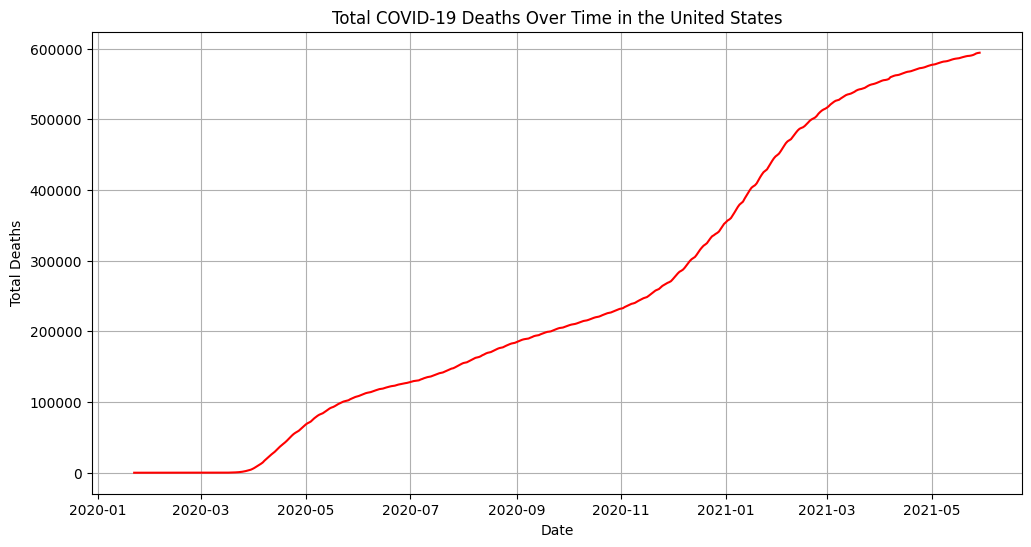

In [311]:
death_cases_in_us = death_cases_data[death_cases_data['Country/Region'] == "US"]

death_cases_in_us = death_cases_in_us.drop(columns=['Lat','Long','Province/State','Country/Region'])

death_cases_in_us = death_cases_in_us.T

death_cases_in_us.index = pd.to_datetime(death_cases_in_us.index,format='%m/%d/%y')

plt.figure(figsize=(12,6))
plt.plot(death_cases_in_us.index, death_cases_in_us.values, color='red')
plt.title('Total COVID-19 Deaths Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

## Q 7 :- DATA MERGING


### Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

Ans :-

1. First I will remove the unwanted columns from all the three data.
2. I melt down the data in the long format to do the operation same like we did earlier
3. Now I will convert the date into the date_type
4. Now merge all the data one by one


In [2]:
# Drop the columns listed in named_cols from confirmed_cases_data
named_cols = ['Province/State','Lat','Long']
confirmed_cases_data_dupli = confirmed_cases_data.drop(named_cols, axis=1)
deaths_cases_data_dupli = death_cases_data.drop(named_cols, axis=1)
recovered_cases_data_dupli = recovered_cases_data.drop(named_cols, axis=1)


confirmed_long = confirmed_cases_data_dupli.melt(id_vars=['Country/Region'], 
                                    var_name='Date', 
                                    value_name='Confirmed')

deaths_long = deaths_cases_data_dupli.melt(id_vars=['Country/Region'], 
                                    var_name='Date', 
                                    value_name='Deaths')

recovered_long = recovered_cases_data_dupli.melt(id_vars=['Country/Region'], 
                                    var_name='Date', 
                                    value_name='Recovered')


confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], errors='coerce',format='%m/%d/%y')
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], errors='coerce',format='%m/%d/%y')
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'], errors='coerce',format='%m/%d/%y')

merged_data = confirmed_long.merge(deaths_long, on=['Country/Region', 'Date'])
merged_data = merged_data.merge(recovered_long, on=['Country/Region', 'Date'])

merged_data.head(1000)


NameError: name 'confirmed_cases_data' is not defined

### 7.2 :- Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset].

Ans :-
a. I will add a new column 'Month' and retrive the month form the data (Used Ai here)
b. Then I will group by Country and Month and sum all the cases.
c. done.


In [ ]:
# Add a 'Month' column to merged_data
# .dt.to_period('M') converts the datetime in 'Date' column to a monthly period (e.g., 2020-03)
# This allows us to group data by month easily, rather than by exact date.
merged_data['Month'] = merged_data['Date'].dt.to_period('M')

# Group by Country/Region and Month, then sum the cases
monthly_summary = merged_data.groupby(['Country/Region', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

monthly_summary.head()

### 7.3 :- Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

Ans :-
Now I already have monthly_summary with me

1. I will put the countries i want to do the analysis
2. Now I will pick those three countries analysis specifically in new varaible
   and done


In [ ]:
selected_countries = ['US', 'Italy', 'Brazil']
monthly_summary_selected = monthly_summary[monthly_summary['Country/Region'].isin(selected_countries)]

# Display the first few rows for these countries
monthly_summary_selected.head()

## Question 8: Combined Data Analysis


### Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

Ans :-

1. Firstly I will conditionaly pick the data from 1 jan 2020 to 31 dec 2020
2. Now from the new_mergeddata I will convert the confirmed and deaths columns into numeric because we have to do divide operation here for death rates
3. Now I create a column in newly merged deathRate and divide both.
4. now I willl remove the Infinte values (Used AI here )
5. Now to find avg death rates , I will group the data in country/Region and find the means of the death Rate and the sort the results.
   done.


In [1]:
merged_2020 = merged_data[(merged_data['Date'] >= '2020-01-01') & (merged_data['Date'] <= '2020-12-31')].copy()
merged_2020['Confirmed'] = pd.to_numeric(merged_2020['Confirmed'], errors='coerce')
merged_2020['Deaths'] = pd.to_numeric(merged_2020['Deaths'], errors='coerce')

merged_2020['DeathRate'] = merged_2020['Deaths'] / merged_2020['Confirmed']
merged_2020['DeathRate'] = merged_2020['DeathRate'].replace([float('inf'), -float('inf')], float('nan'))

avg_death_rate_2020 = merged_2020.groupby('Country/Region')['DeathRate'].mean().sort_values(ascending=False)


top3_death_rate_countries.head(3)

NameError: name 'merged_data' is not defined

### Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

Ans :-

1. Now in order to do this question I will first extract the South Africa data from the Merged data
2. Now then we extract the latest date from the South Africa's Data
3. Now we use this latest data to extract the latest data.
4. Now from this latest data we will sum all recovered and sum all deaths
5. If Recovered are greater than deaths than country going good.


In [ ]:
sa_data = merged_data[merged_data['Country/Region'] == 'South Africa']

latest_date = sa_data['Date'].max() 
sa_latest = sa_data[sa_data['Date'] == latest_date] 


total_recovered = sa_latest['Recovered'].sum()
total_deaths = sa_latest['Deaths'].sum()

print("🇿🇦 South Africa on", latest_date.date())
print("Total Recoveries:", total_recovered)
print("Total Deaths:", total_deaths)

# Compare
if total_recovered > total_deaths:
    print("Most COVID-19 cases recovered.")
else:
    print("More people died than recovered")

NameError: name 'merged_data' is not defined

### Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

Ans :-

1. First I will filter the data for Us and from a specific date range and make a copy of it.

2. Then I will add the month column in it.

3. Now I will group the data on the basis of Month and sum the recovered and confirmed columns.

4. Now to calculate recover ratio I will create a column of recovered ratio in that grouped data and divide the recovered / confirmed.

5. Now I will find the month with highest recover ratio and also it's value.

6. It will do.


In [ ]:
# Filter for US and date range
us_data = merged_data[(merged_data['Country/Region'] == 'US') &
                    (merged_data['Date'] >= '2020-03-01') &
                    (merged_data['Date'] <= '2021-05-31')].copy()

# Add 'Month' column
us_data['Month'] = us_data['Date'].dt.to_period('M')

# Group by month and sum recoveries and confirmed cases
monthly_us = us_data.groupby('Month')[['Recovered', 'Confirmed']].sum()

# Calculate recovery ratio
monthly_us['RecoveryRatio'] = monthly_us['Recovered'] / monthly_us['Confirmed']

# Find the month with the highest recovery ratio
max_month = monthly_us['RecoveryRatio'].idxmax()
max_ratio = monthly_us['RecoveryRatio'].max()

print("Month with highest recovery ratio:", max_month)
print("Highest recovery ratio:", max_ratio)
monthly_us